In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [2]:
data=pd.read_csv("company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
label_encoder=preprocessing.LabelEncoder()
data["ShelveLoc"]=label_encoder.fit_transform(data["ShelveLoc"])
data["Urban"]=label_encoder.fit_transform(data["Urban"])
data["US"]=label_encoder.fit_transform(data["US"])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


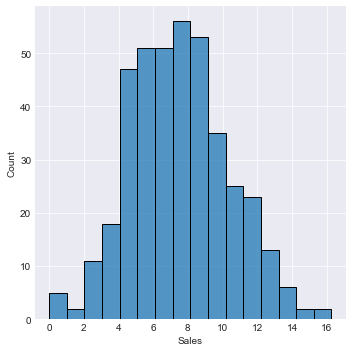

In [4]:
plt.style.use("seaborn-darkgrid")
sns.displot(data["Sales"])

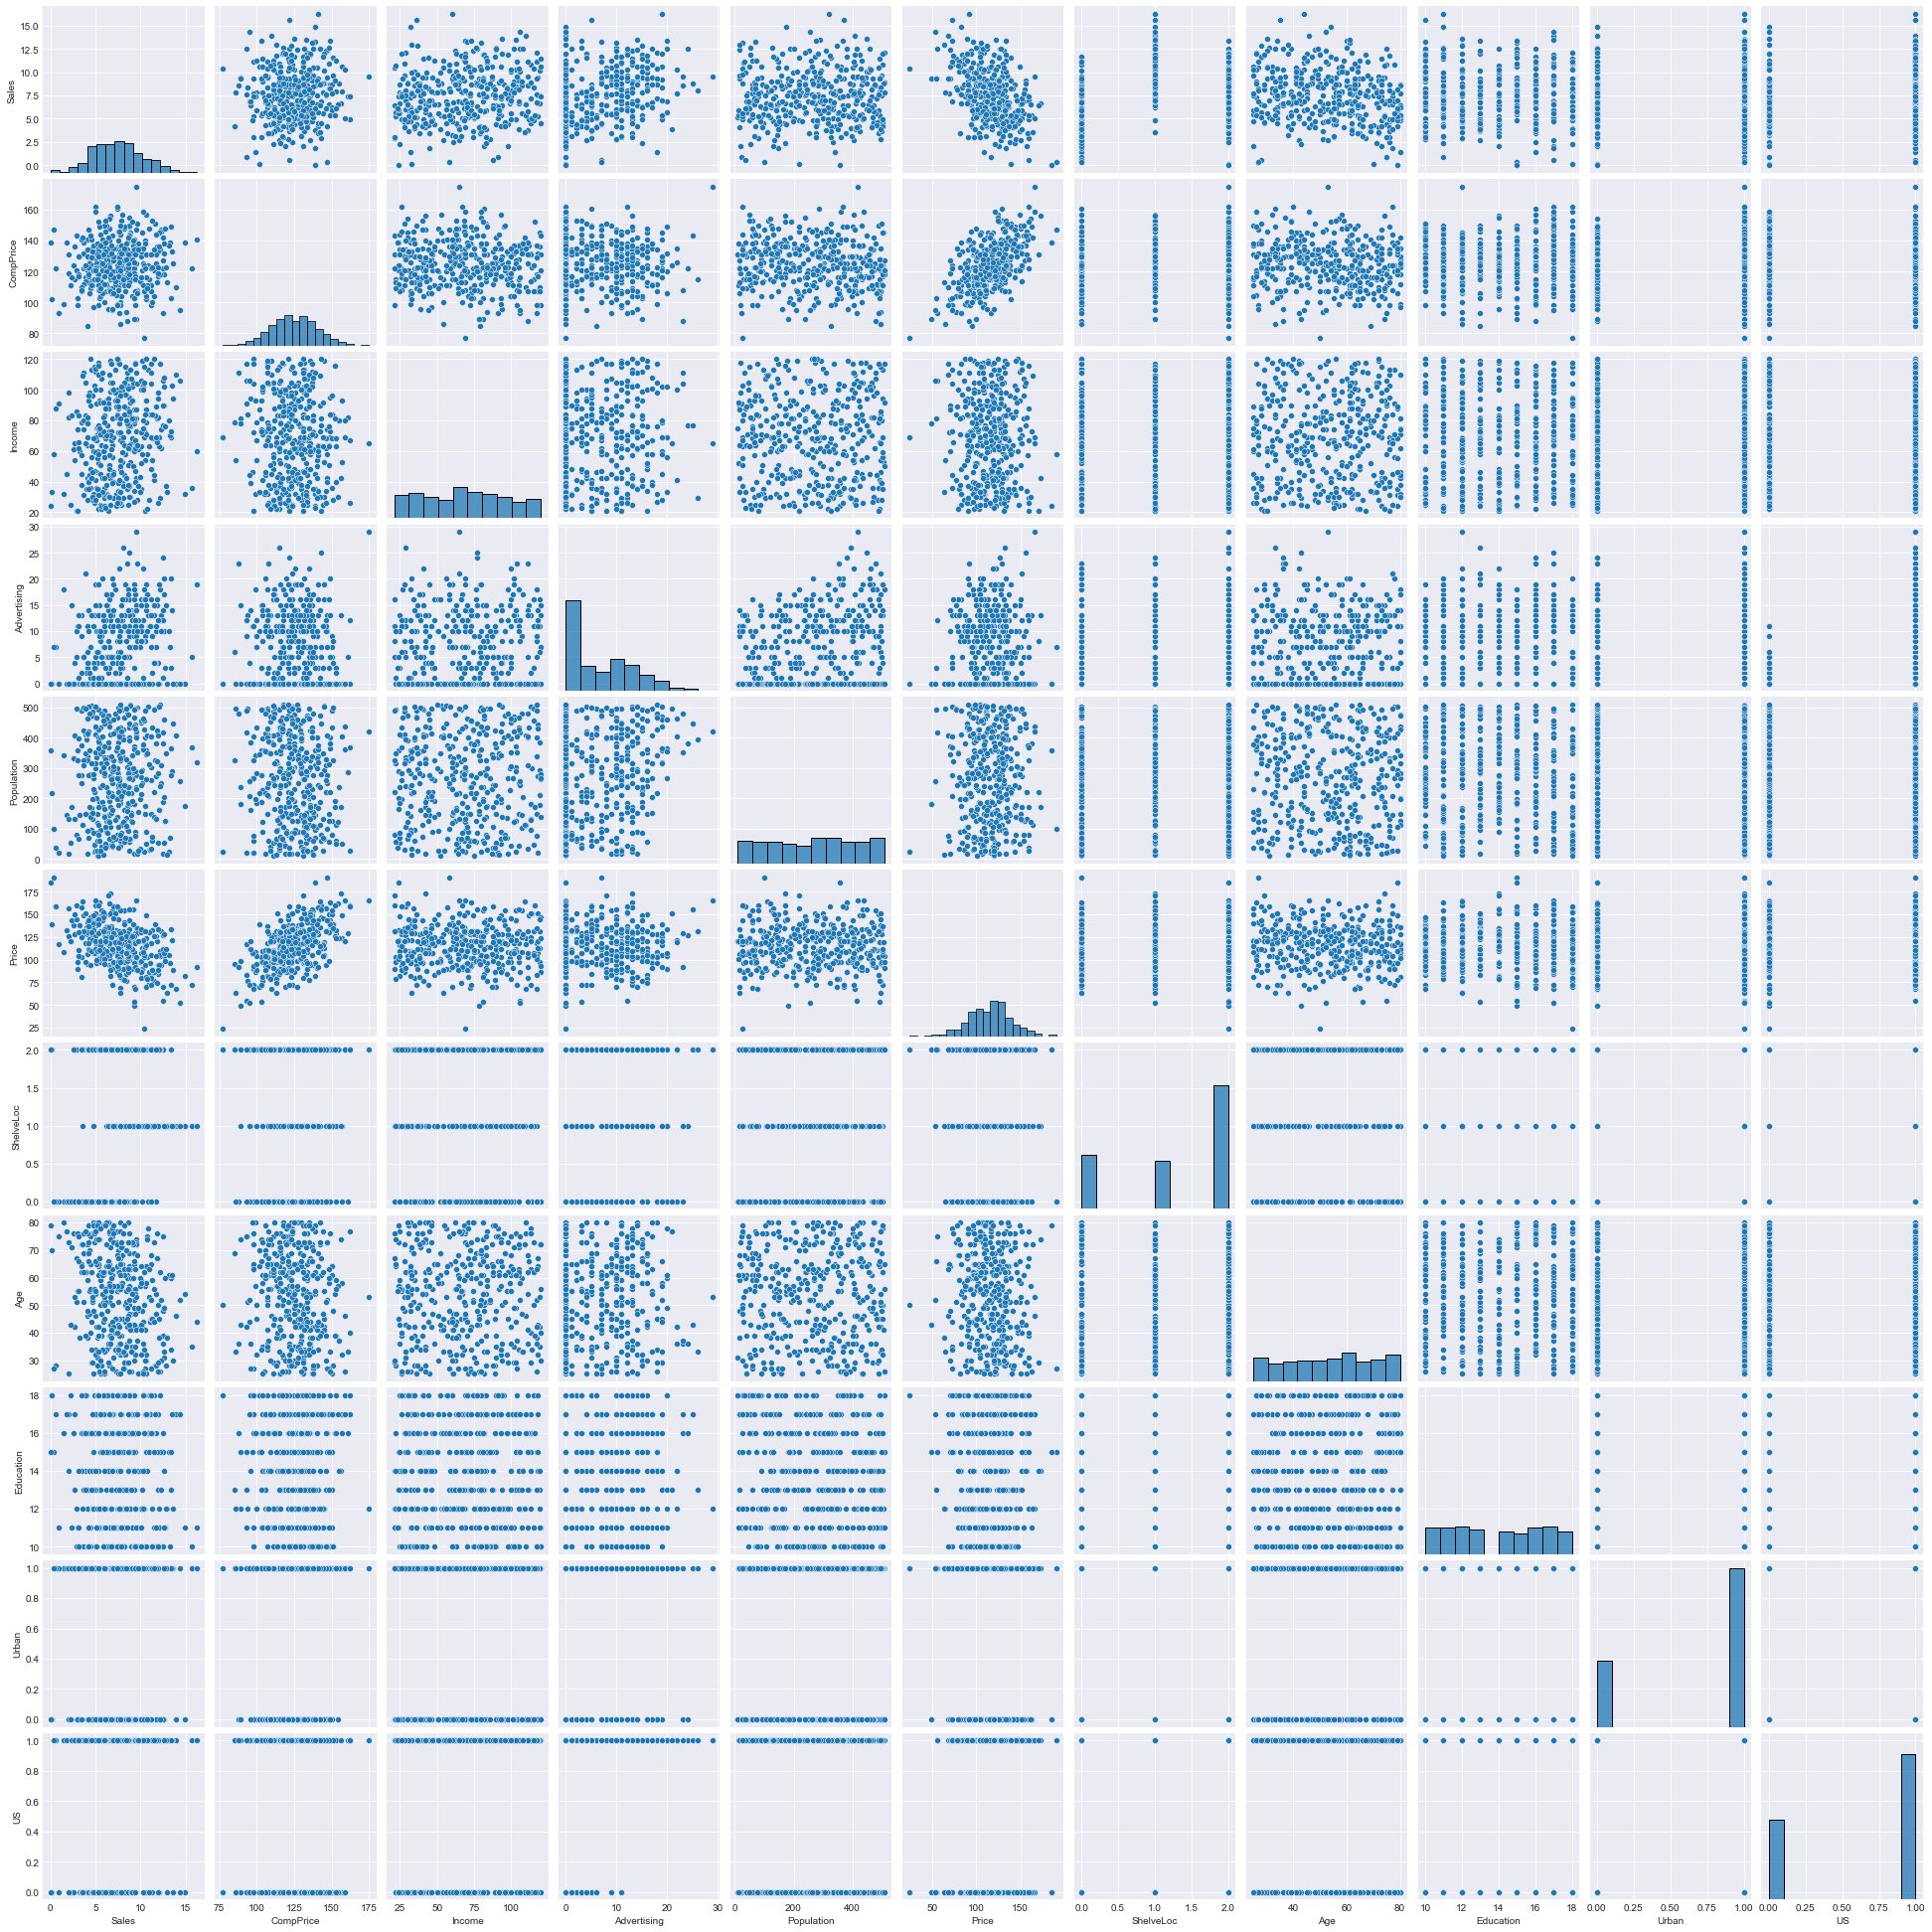

In [5]:
sns.pairplot(data)

In [6]:
data["High"]=data.Sales.map(lambda x: 1 if x>8 else 0)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


# Model Building

In [7]:
x=data.drop(["High"],axis=1)
y=data["High"]
data.dropna()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [9]:
model=DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=10,max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)

In [10]:
y_train_pred=model.predict(x_train)

In [11]:
from sklearn.metrics import classification_report as cr
print(cr(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       119

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



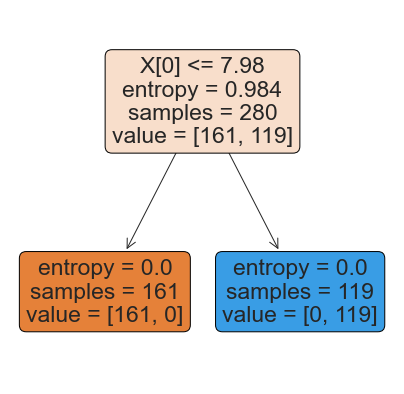

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(7,7))

plot_tree(decision_tree=model, rounded=True, filled=True)
plt.show()

In [13]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    74
1    46
dtype: int64

In [14]:
pd.crosstab(y_test,preds)

col_0,0,1
High,,
0,74,1
1,0,45


In [15]:
np.mean(preds==y_test)

0.9916666666666667

In [16]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
0.9916666666666667
